## Import dependencies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import os
print(os.listdir())

['.git', '.gitattributes', '.ipynb_checkpoints', 'regression.ipynb']


## Load data

In [4]:
boston = datasets.load_boston()
X = boston['data']
y = boston['target']
feature_names = boston['feature_names']
print("Features:", feature_names, '\n')
print(boston['DESCR'])

Features: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility t

In [5]:
df = pd.DataFrame(X, columns = feature_names)
df['MEDV'] = y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Exploratory Data Analysis (EDA)

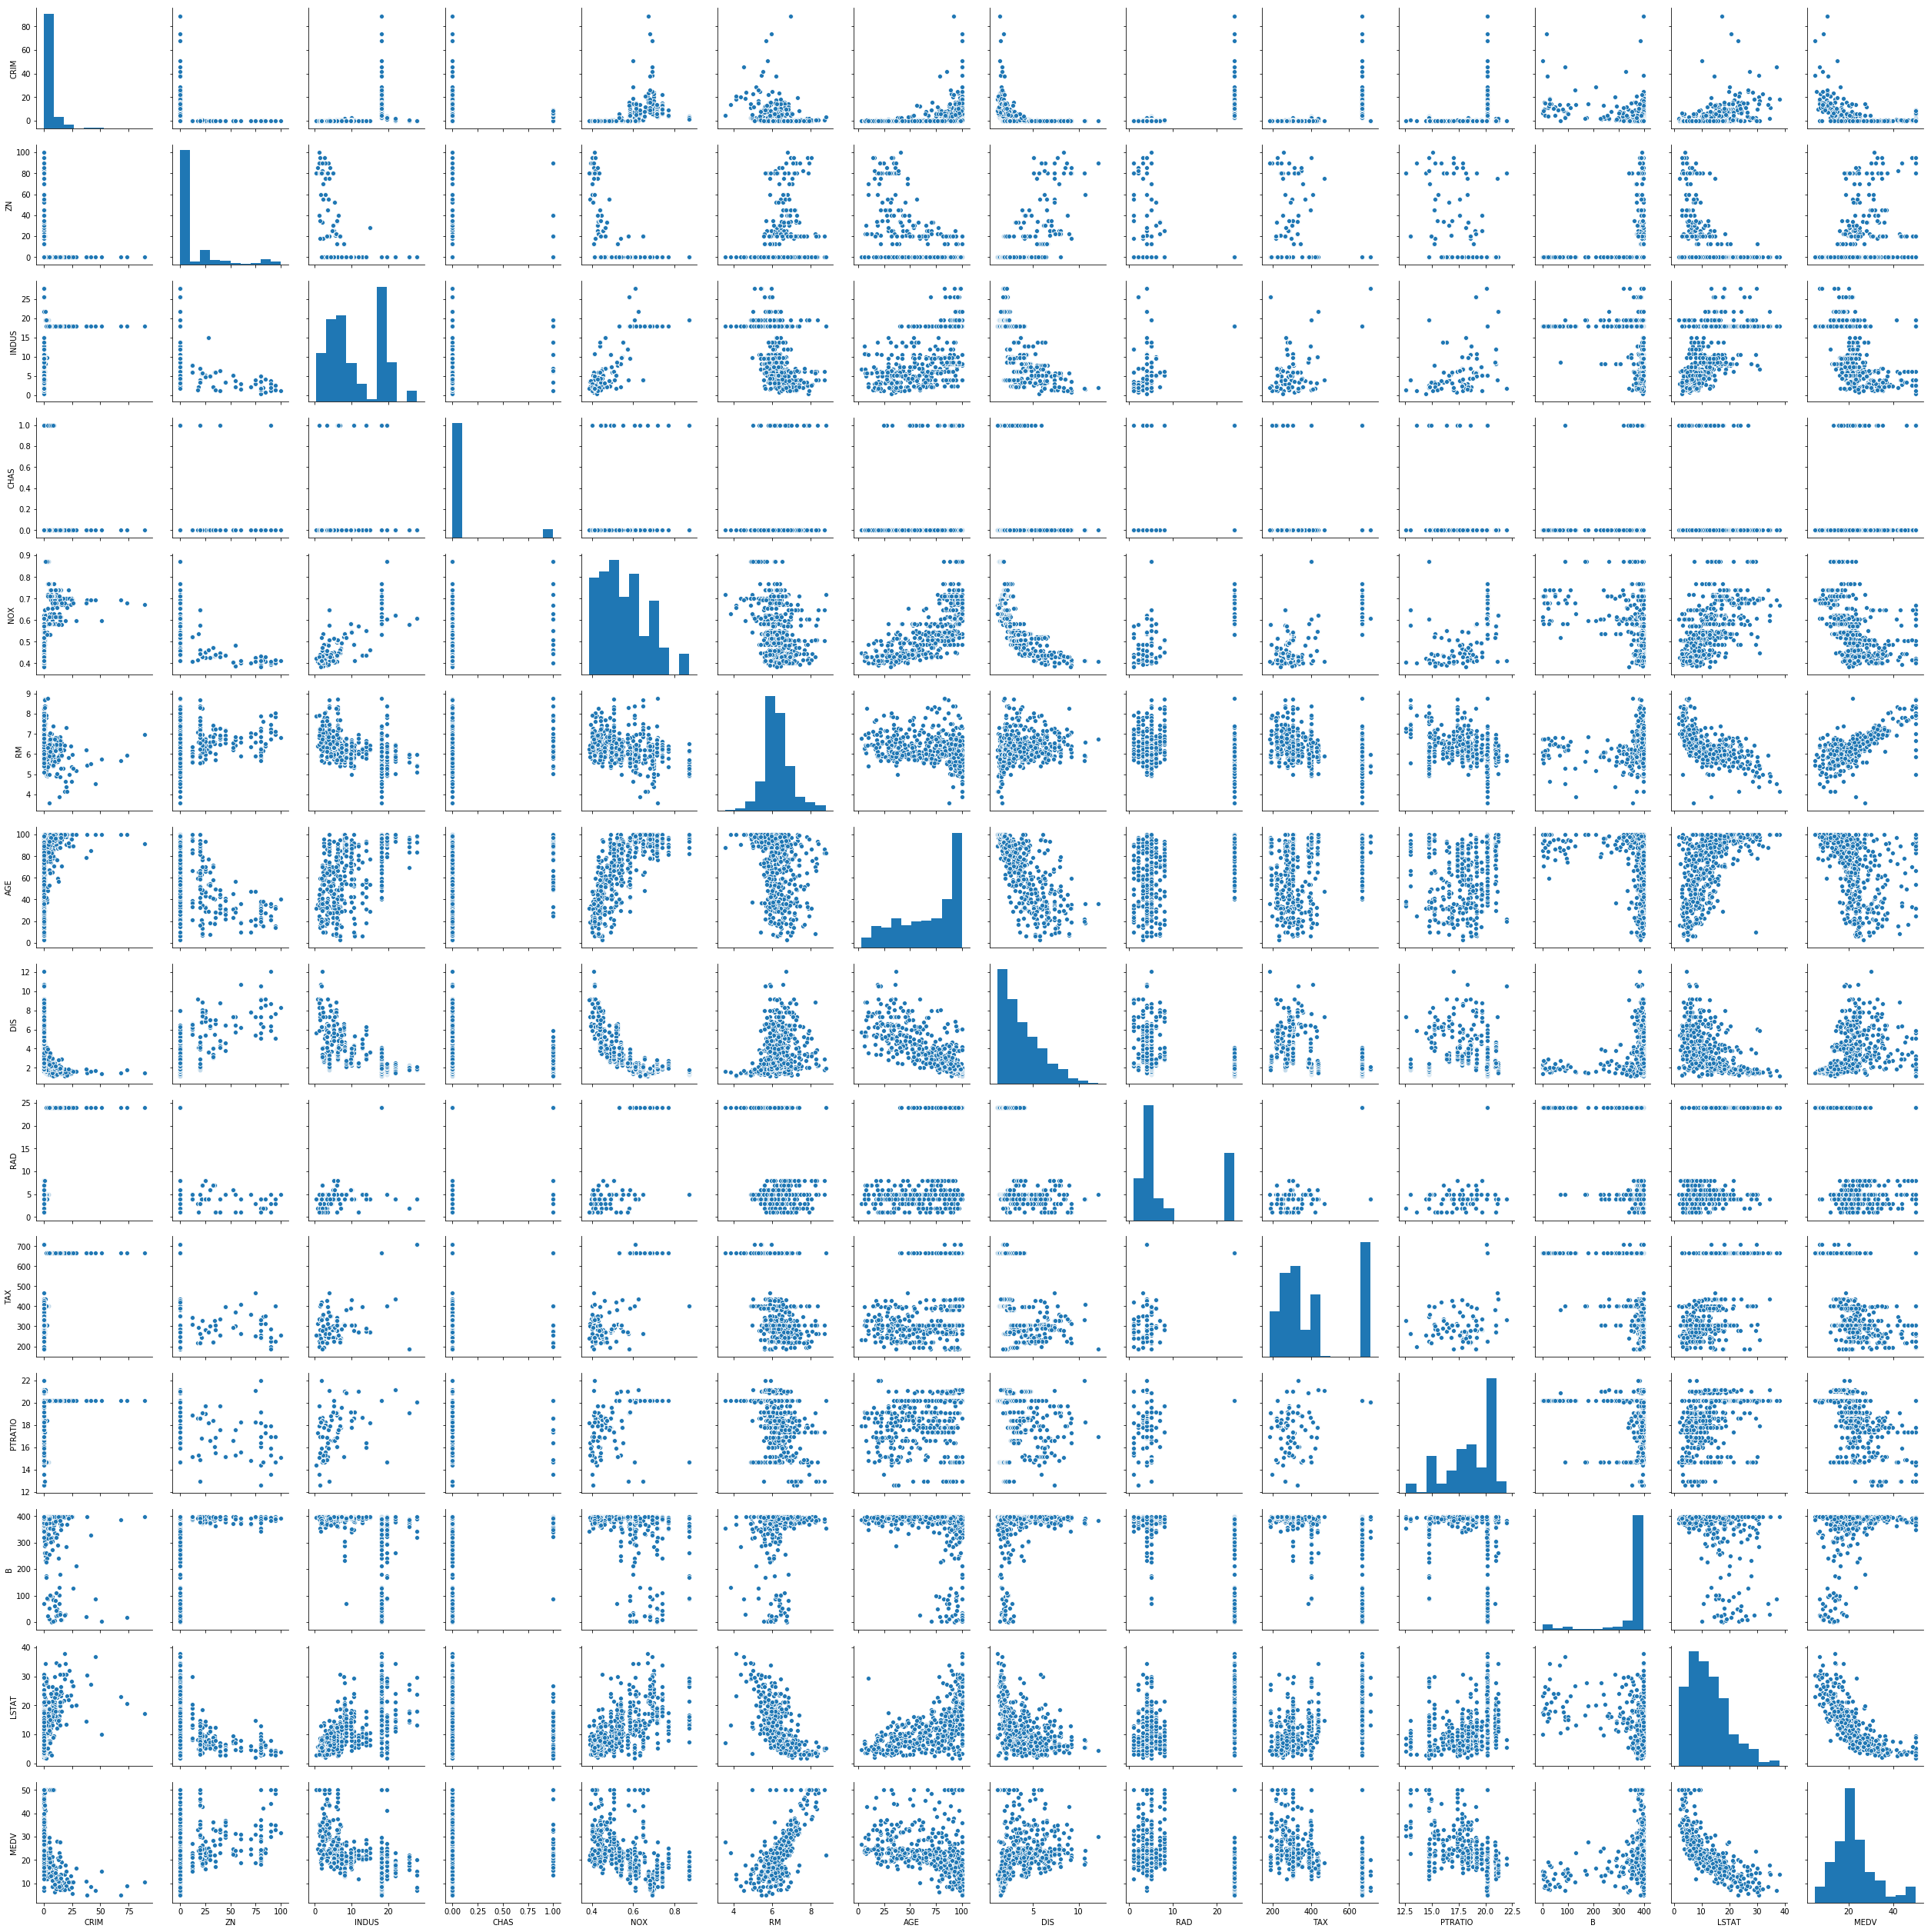

In [6]:
sns.pairplot(df)

## Feature selection

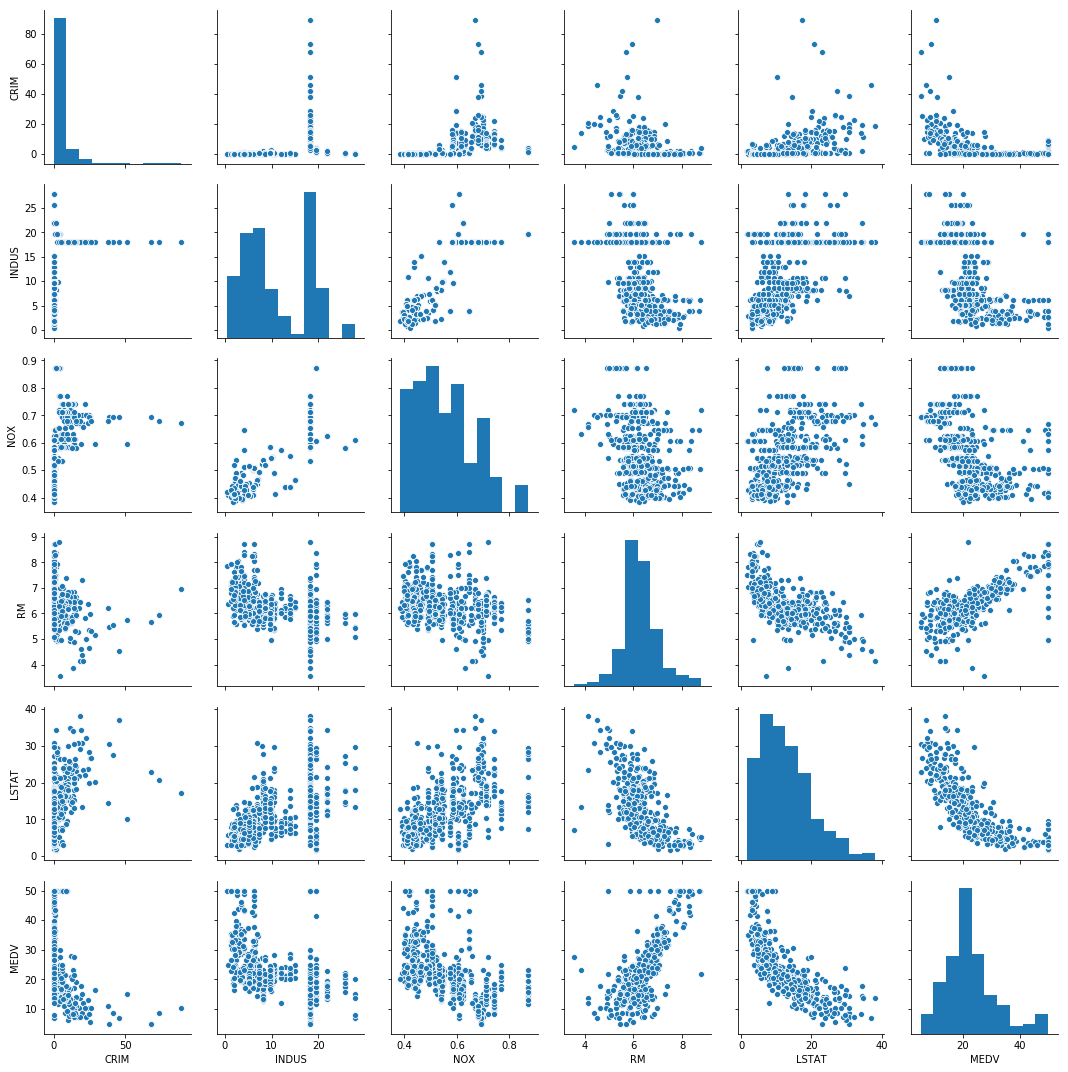

In [7]:
features = ['CRIM', 'INDUS', 'NOX', 'RM', 'LSTAT']
sns.pairplot(df[features + ['MEDV']])

In [8]:
X = np.array(df[features])
X

array([[6.3200e-03, 2.3100e+00, 5.3800e-01, 6.5750e+00, 4.9800e+00],
       [2.7310e-02, 7.0700e+00, 4.6900e-01, 6.4210e+00, 9.1400e+00],
       [2.7290e-02, 7.0700e+00, 4.6900e-01, 7.1850e+00, 4.0300e+00],
       ...,
       [6.0760e-02, 1.1930e+01, 5.7300e-01, 6.9760e+00, 5.6400e+00],
       [1.0959e-01, 1.1930e+01, 5.7300e-01, 6.7940e+00, 6.4800e+00],
       [4.7410e-02, 1.1930e+01, 5.7300e-01, 6.0300e+00, 7.8800e+00]])

## Feature preparation

Many machine learning and optimization algorithms also require feature scaling for optimal performance. Here, we will standardize the features using the StandardScaler class from scikit-learn's preprocessing module:

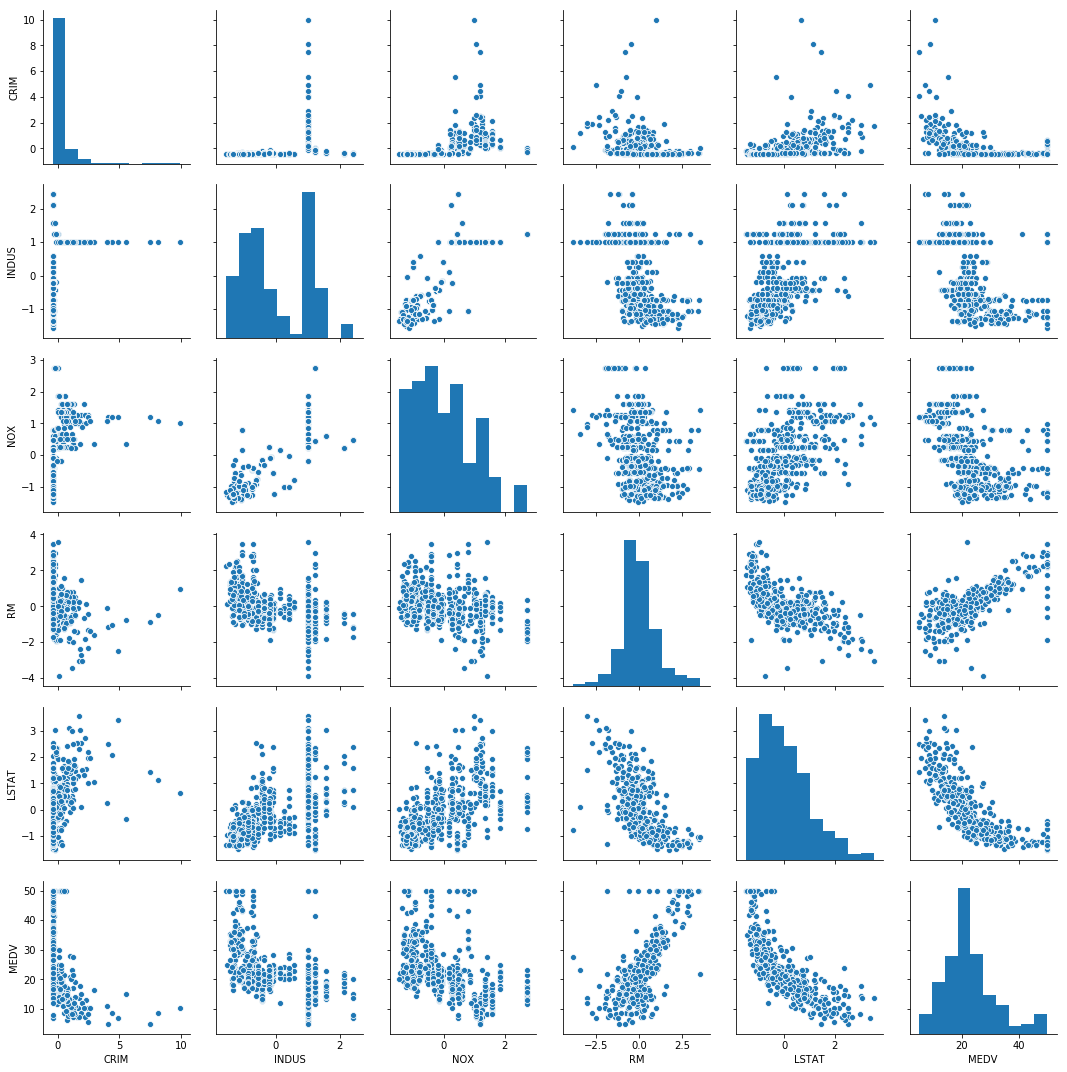

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
#y_scaled = sc.fit_transform(y)
df_scaled = pd.DataFrame(X_scaled, columns=features)
df_scaled['MEDV'] = y
sns.pairplot(df_scaled)

## Train-test split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Training:", len(X_train), len(y_train))
print("Testing:", len(X_test), len(y_test))

Training: 354 354
Testing: 152 152
